In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter
import os
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D


from kalman_utils_3D import *
from model_evaluation_3D import plot_residuals

from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from scipy.linalg import block_diag
from filterpy.stats import plot_covariance_ellipse
from filterpy.common import Saver

In [2]:
traj = Trajectoy3DGenerattion(sigma=0.5)

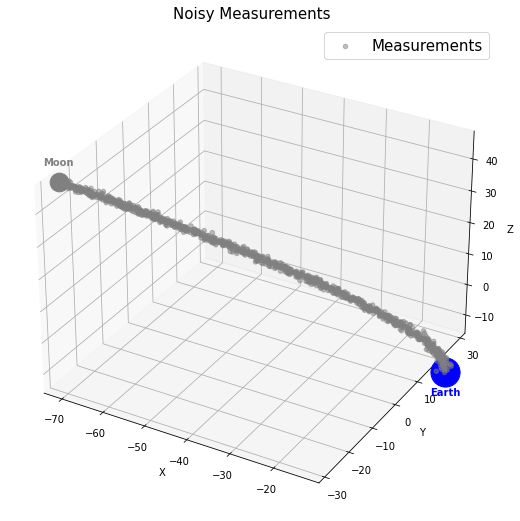

In [3]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

plot_measurements_3D(traj, ax, title="Noisy Measurements")

In [4]:
def get_filename_from_ax(ax):
    title = ax.get_title().split(" ")
    s = ""
    for i,f in enumerate(title):
        if i <= len(title)-1 and i > 0:
            s+="_"+f
        else:
            s+=f
    if '-' in s:
        s = s.replace("-","_")
    if '=' in s:
        s = s.replace("=","_")
    return s

In [5]:
tracker = Ship_tracker(traj)
preds, cov = run(tracker, traj)

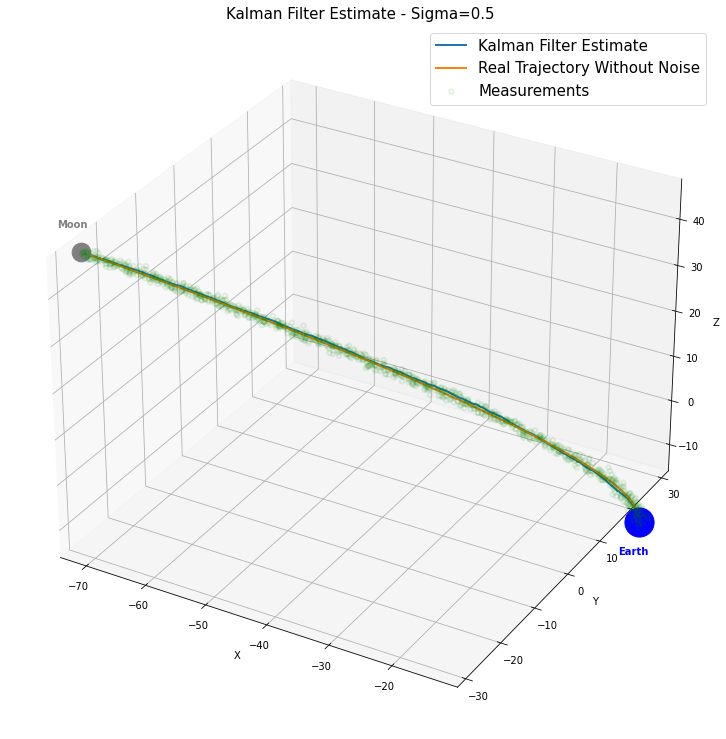

In [6]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds, traj, ax)
filename = get_filename_from_ax(ax)

fig.savefig(os.path.join("Plots", filename+".png"))


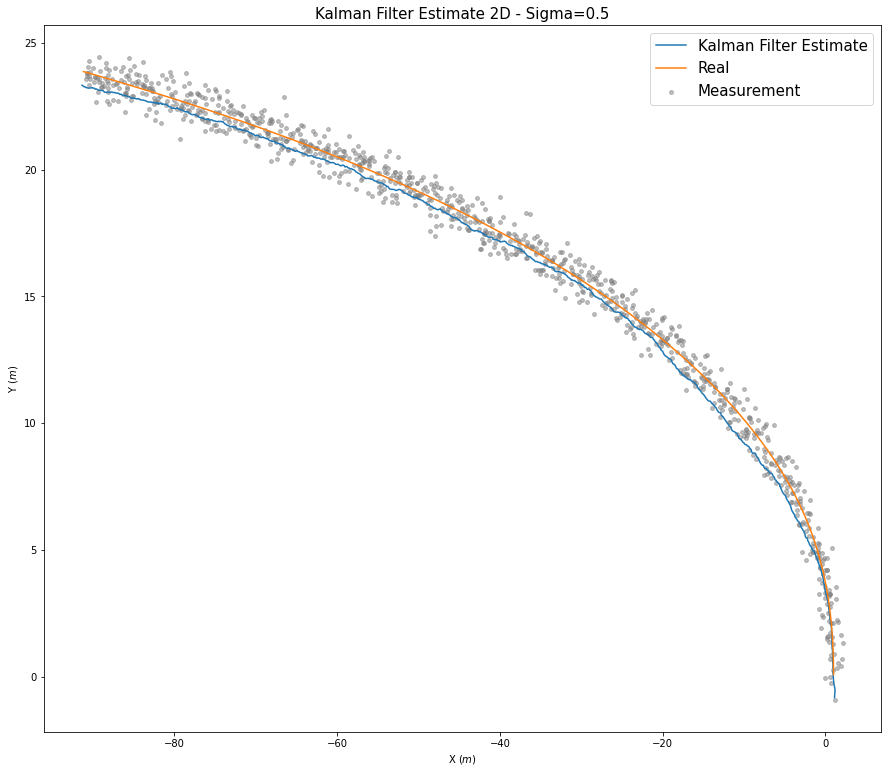

In [7]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
plot_x_z_2D(ax,traj, preds)

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

# Experiments : Signal Loss Simulation

## EX. 1 : The filter takes only the first half of the measurements

In [8]:
tracker_2 = Ship_tracker(traj)
preds_2, cov_2 = run_half_measures(tracker_2, traj)

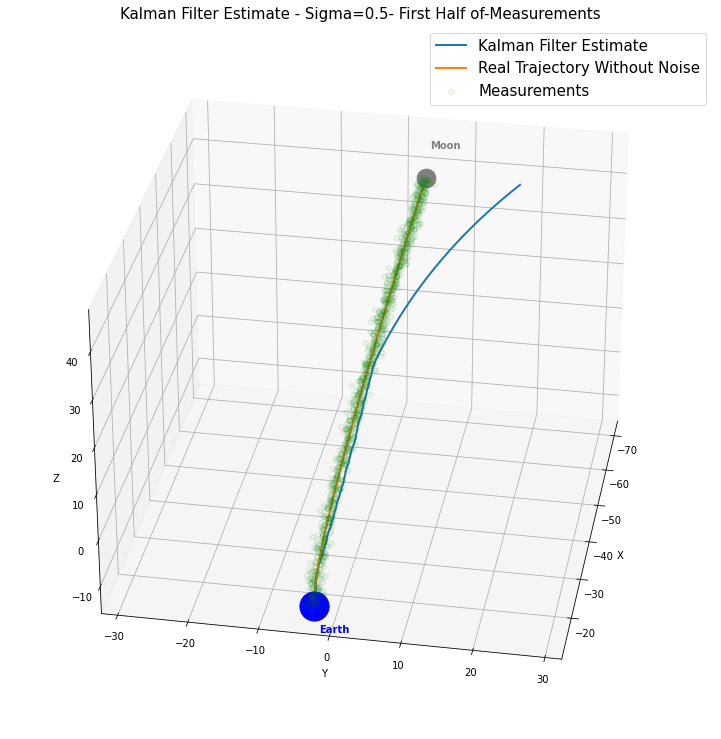

In [9]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds_2, traj, ax)
ax.set_title(ax.get_title()+"- First Half of-Measurements",fontsize=15)
ax.view_init(azim=10)
filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

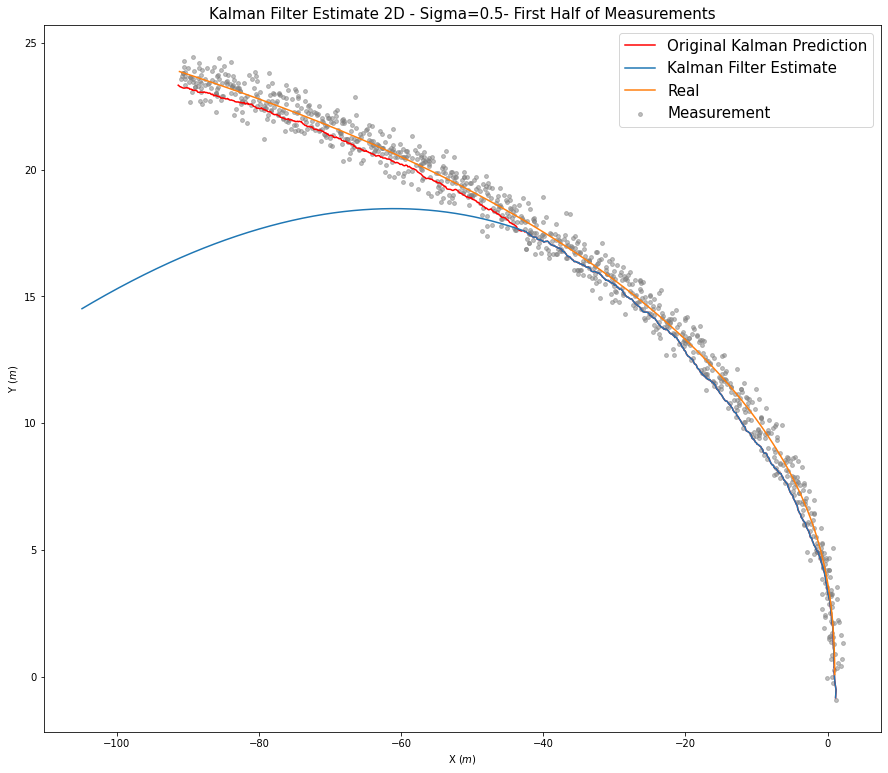

In [10]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.plot(preds[:,0], preds[:,2], c='r', label = "Original Kalman Prediction")
plot_x_z_2D(ax,traj, preds_2)
ax.set_title(ax.get_title()+"- First Half of Measurements",fontsize=15)

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

## EX. 2 : The filter takes only the even index of the measurements

In [11]:
tracker_3 = Ship_tracker(traj)
preds_3, cov_3 = run_even_index_update(tracker_3, traj)

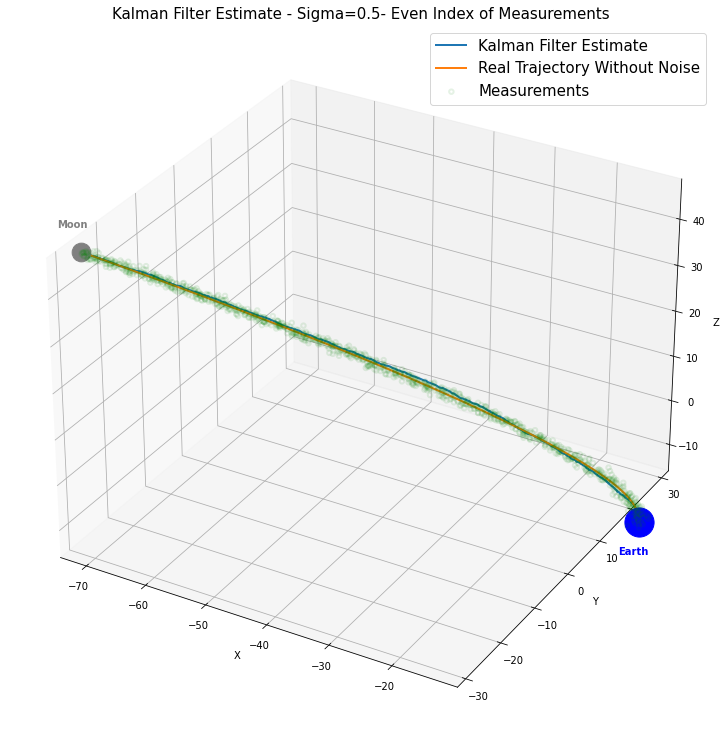

In [12]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds_3, traj, ax)
ax.set_title(ax.get_title()+"- Even Index of Measurements", fontsize=15)
#ax.view_init(azim=10)
filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

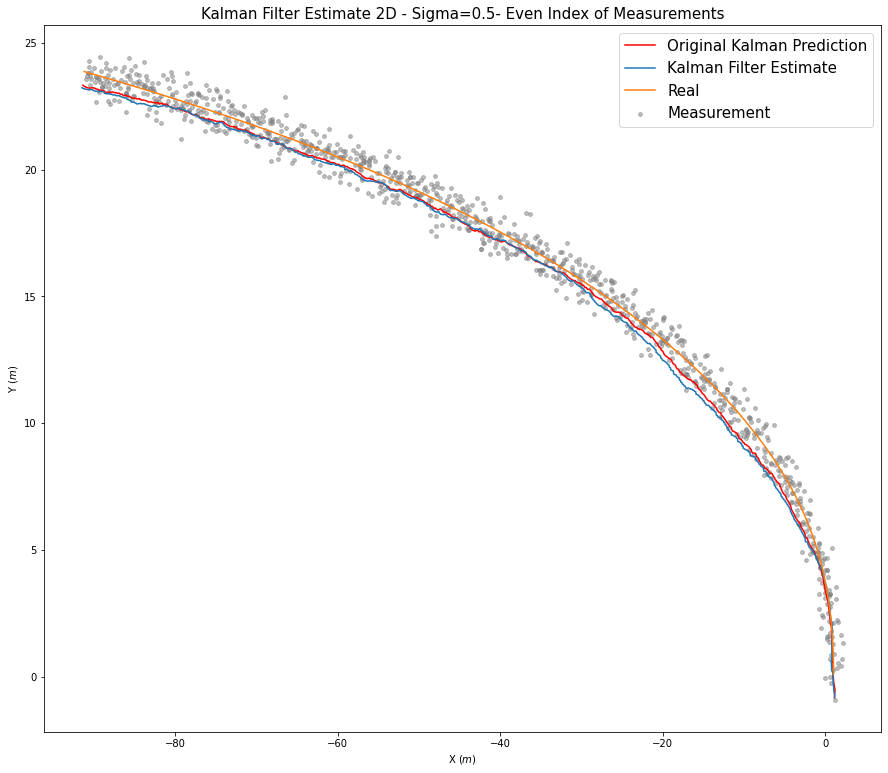

In [13]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.plot(preds[:,0], preds[:,2], c='r', label = "Original Kalman Prediction")
plot_x_z_2D(ax,traj, preds_3)
ax.set_title(ax.get_title()+"- Even Index of Measurements",fontsize=15)

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

## EX. 3 : The filter takes just a measurments every 5 

In [14]:
tracker_4 = Ship_tracker(traj)
preds_4, cov_4 = run_update_every_5(tracker_4, traj)

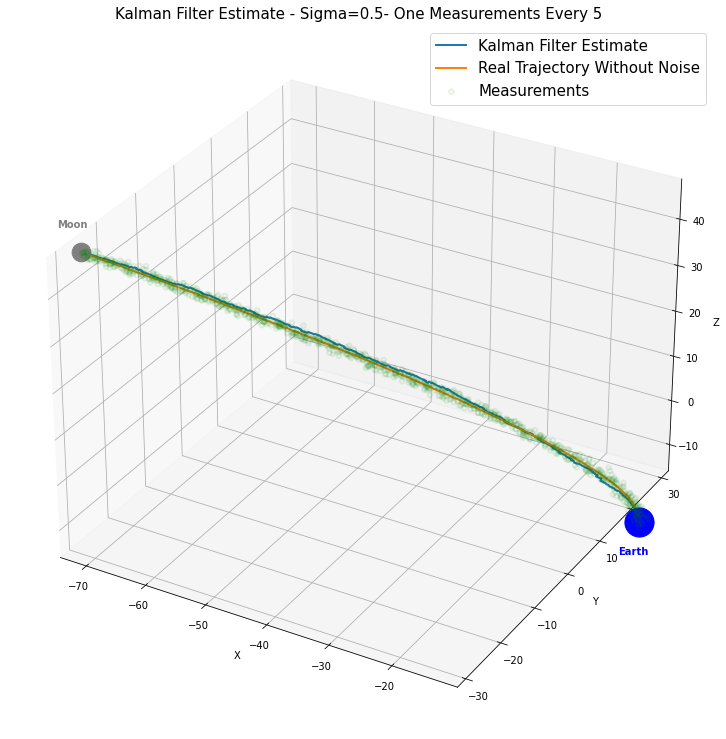

In [15]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds_4, traj, ax)
ax.set_title(ax.get_title()+"- One Measurements Every 5 ", fontsize=15)
#ax.view_init(azim=10)
filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

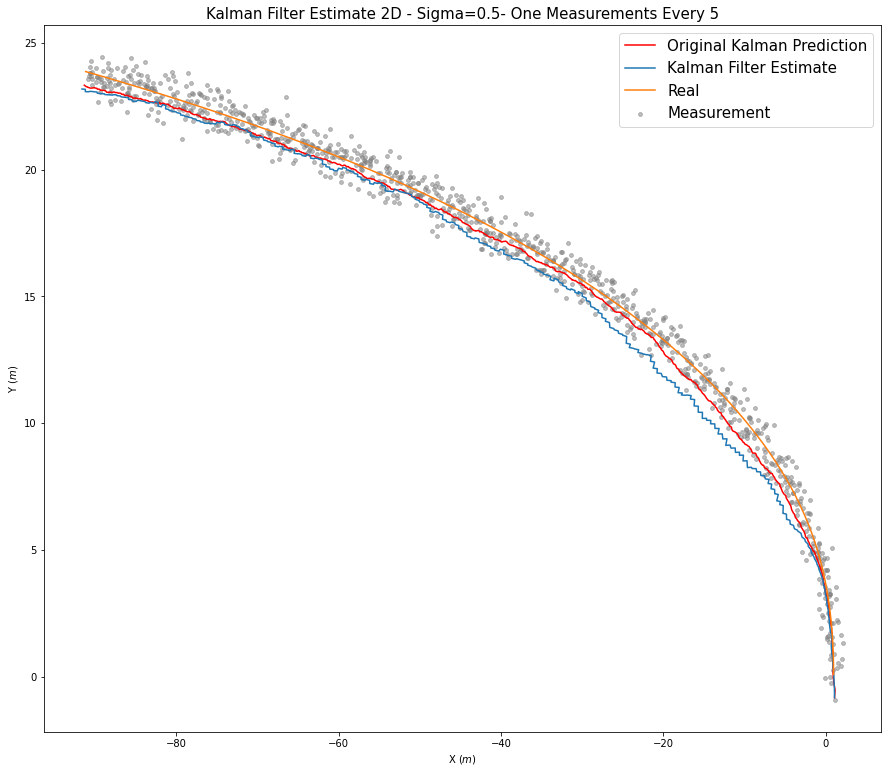

In [16]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.plot(preds[:,0], preds[:,2], c='r', label = "Original Kalman Prediction")
plot_x_z_2D(ax,traj, preds_4)
ax.set_title(ax.get_title()+"- One Measurements Every 5",fontsize=15)

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

## EX. 4 : The filter has missed measurement at half trip

In [17]:
tracker_5 = Ship_tracker(traj)
preds_5, cov_5 = run_update_hole_in_middle(tracker_5, traj)

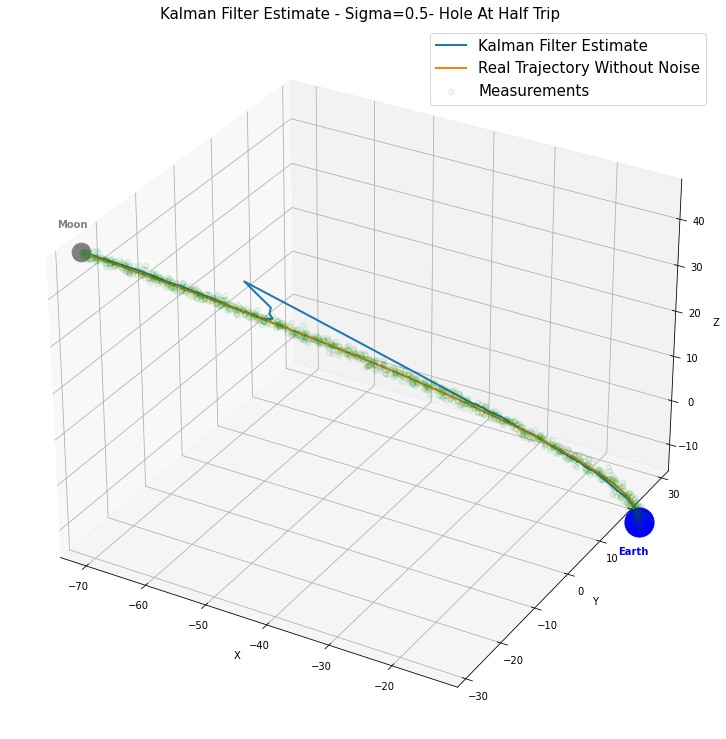

In [18]:
fig = plt.figure(figsize=(16,13))
ax = fig.add_subplot(111, projection='3d')
plot_prediction(preds_5, traj, ax)
ax.set_title(ax.get_title()+"- Hole At Half Trip", fontsize=15)
#ax.view_init(azim=10)
filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))

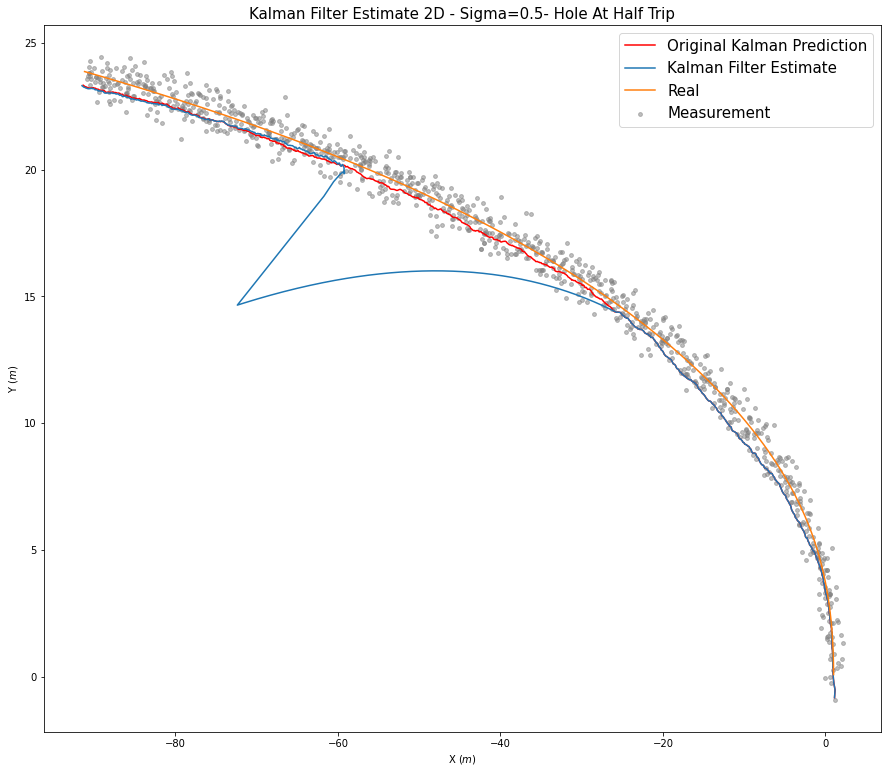

In [19]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
ax.plot(preds[:,0], preds[:,2], c='r', label = "Original Kalman Prediction")
plot_x_z_2D(ax,traj, preds_5)
ax.set_title(ax.get_title()+"- Hole At Half Trip",fontsize=15)

filename = get_filename_from_ax(ax)
fig.savefig(os.path.join("Plots", filename+".png"))


fig = plt.figure(figsize=(10,10))
ax_2 = Axes3D(fig)
ax_2.plot(3, 2, 1, marker='.', lw=3)

# ANIMATION

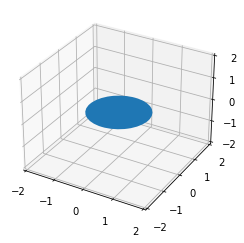

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d


fig = plt.figure()
ax=fig.gca(projection='3d')


circle = Circle((0, 0), 1)
ax.add_patch(circle)
art3d.pathpatch_2d_to_3d(circle, z=0, zdir='y')


ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

plt.show()

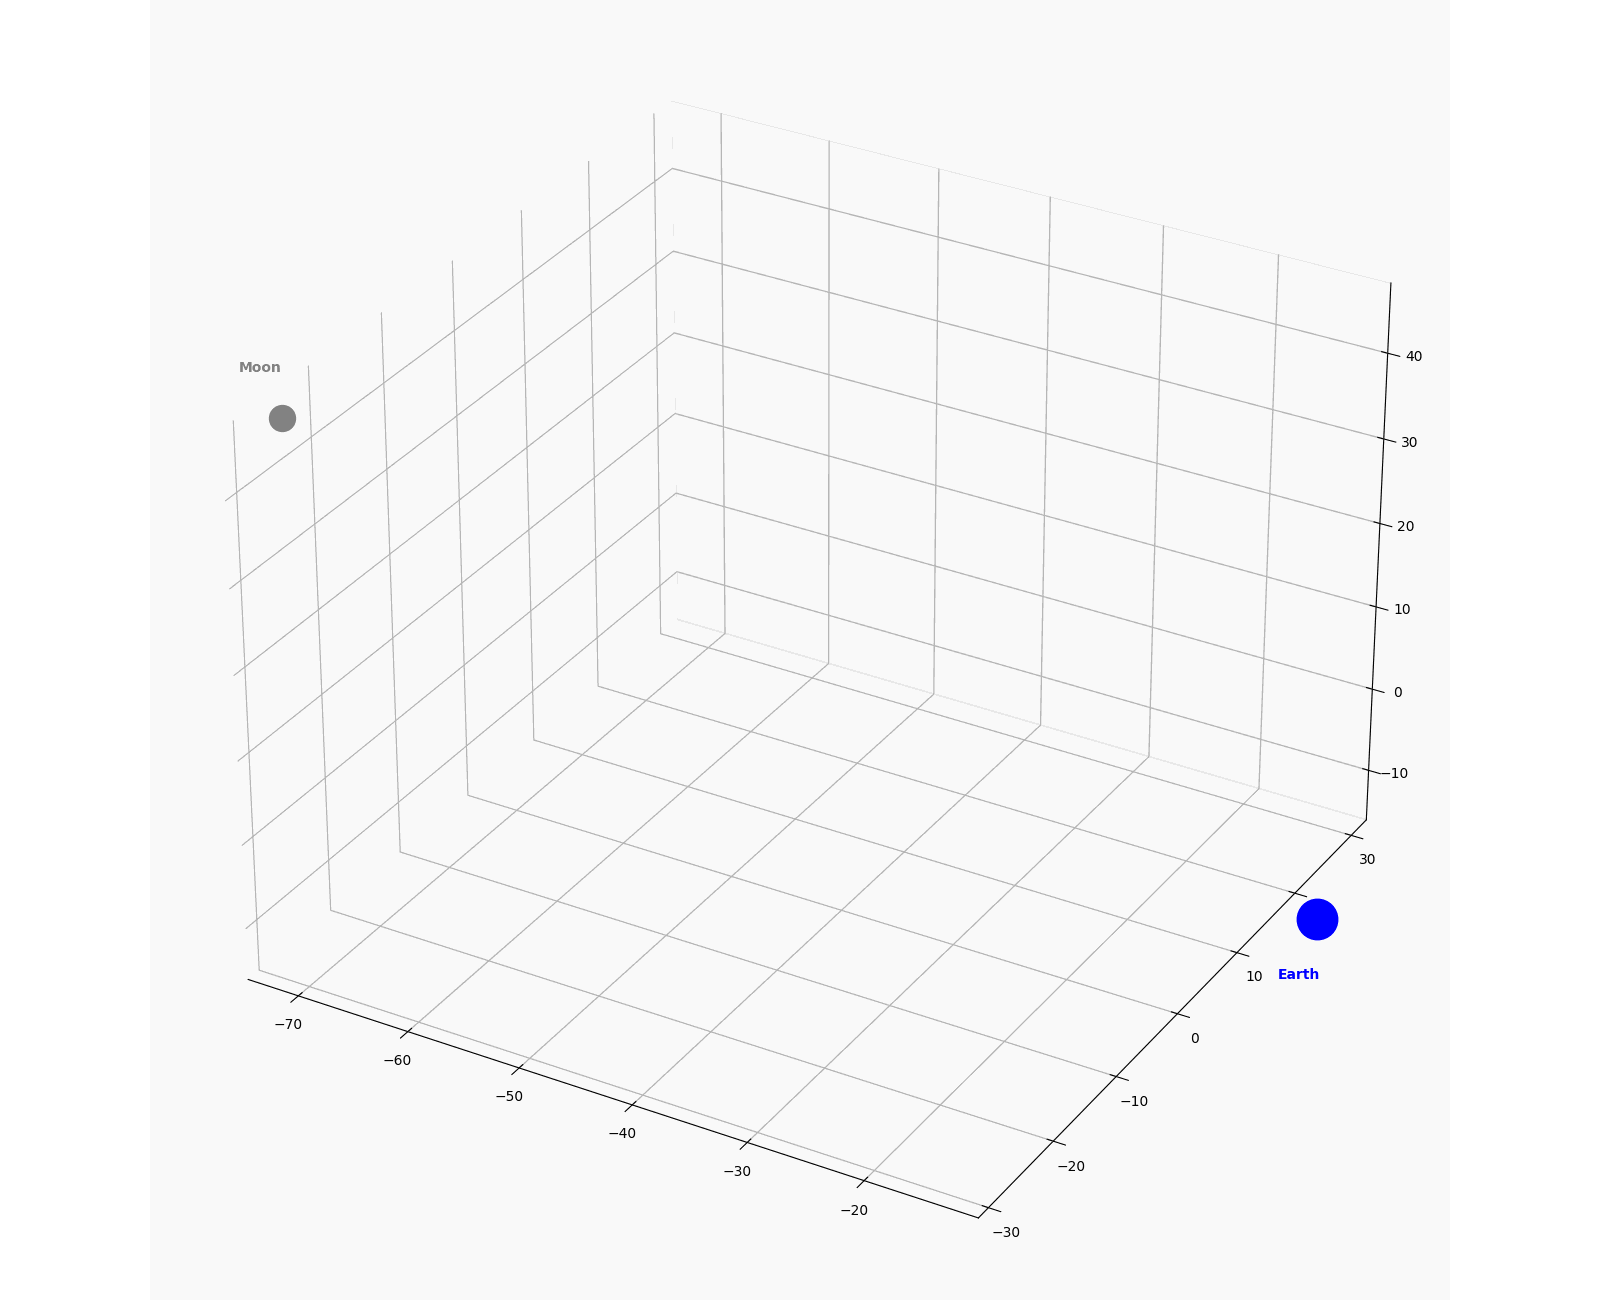

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation



x_pred = preds[:,0]
y_pred = preds[:,1]
z_pred = preds[:,2]

x_target, y_target, z_target = traj.get_measurements()
Xr, Yr, Zr = traj.get_trajectory_position()

fig_ = plt.figure(figsize=(16, 13))
ax_ = Axes3D(fig_)
plot_planets(Xr,Yr,Zr, ax_)
line, = ax_.plot([], [], [], lw=5, ls='--')


max_range = np.array([x_pred.max()-x_pred.min(), y_pred.max()-y_pred.min(), z_pred.max()-z_pred.min()]).max() / 3.0
   
mean_x = x_pred.mean()
mean_y = y_pred.mean()
mean_z = z_pred.mean()
ax_.set_xlim3d(mean_x - max_range, mean_x + max_range)
ax_.set_ylim3d(mean_y - max_range, mean_y + max_range)
ax_.set_zlim3d(mean_z - max_range, mean_z + max_range)


def init():
    line.set_data_3d([])
    return line,

def update_lines(i):
  
    line.set_data_3d(x_pred[:i], y_pred[:i],z_pred[:i])
    return line,

# Creating the Animation object
anim = FuncAnimation(fig_, update_lines, frames=50, interval=50, blit=True)
writer = PillowWriter(fps=25)  
anim.save( "prova_anim.gif", writer= writer, dpi=100)
plt.close()
    
with open("prova_anim.gif",'rb') as f:
    display(Image(data=f.read(), format='gif'))
